In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist

random.seed(0)
np.random.seed(0)

In [2]:
data = pd.read_csv('Iris.data',sep=',',names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Class'])
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X_old = data[['Sepal Length','Sepal Width','Petal Length','Petal Width']]
X_old

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X1 = data['Sepal Length']/data['Sepal Width']
X2 = data['Petal Length']/data['Petal Width']
dict = {'X1':X1,'X2':X2}
X = pd.DataFrame(dict)
X

,X1,X2
0,1.457143,7.000000
1,1.633333,7.000000
2,1.468750,6.500000
3,1.483871,7.500000
4,1.388889,7.000000
...,...,...
145,2.233333,2.260870
146,2.520000,2.631579
147,2.166667,2.600000
148,1.823529,2.347826


Text(0, 0.5, 'X2')

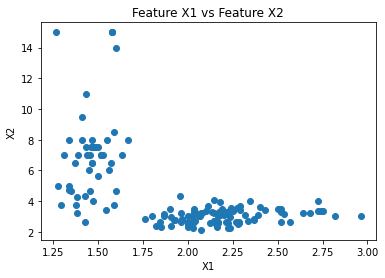

In [345]:
fig,ax = plt.subplots();
ax.scatter(X1,X2)
ax.set_title('Feature X1 vs Feature X2')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

In [17]:
l =X.sample(n=3)
l.describe()

,X1,X2
count,3.000000,3.000000
mean,2.313410,3.022854
std,0.162131,0.666866
min,2.206897,2.260870
25%,2.220115,2.784281
50%,2.233333,3.307692
75%,2.366667,3.403846
max,2.500000,3.500000


In [60]:
X_normal = (X-X.mean())/X.std()
X_normal

,X1,X2
0,-1.249072,0.992957
1,-0.807156,0.992957
2,-1.219959,0.804385
3,-1.182033,1.181529
4,-1.420264,0.992957
...,...,...
145,0.697745,-0.794377
146,1.416753,-0.654566
147,0.530533,-0.666476
148,-0.330113,-0.761582


In [85]:
k,j = X['X1'][0],X['X2'][0]
a = [[0,1],[1,2]]
df1 = pd.DataFrame(a,columns=['X1','X2'])
df1.iloc[[0]]
#df2 = pd.DataFrame(([[2,3]]),columns=['X1','X2'])
#df1.append(df2)

,X1,X2
0,0,1


In [73]:
#Experiment - Kmeans

l =X_normal.sample(n=4)
#print(l)
cluster_to_point = {}
centeroid_to_point_dist={}
for j in range(0,4):
    cluster_to_point[j] = []
    centeroid_to_point_dist[j] = []

for i in range(0,len(X_normal)):
    d = []                    
    for j in range(0,4):      
        d.append(cdist(X_normal.iloc[[i]],l.iloc[[j]],'euclidean')[0][0])
    min_idx = np.argmin(d)  
    x_1 = X_normal['X1'][i]
    x_2 = X_normal['X2'][i]
    x = [x_1,x_2]
    cluster_to_point[min_idx].append(x)
    centeroid_to_point_dist[min_idx].append(d[min_idx])
    
new_centeroids = []
centeroid_to_point_sum =[]

for k in range(0,4):
    new_centeroids.append(pd.DataFrame(cluster_to_point[k],columns=['X1','X2']).mean())
    centeroid_to_point_sum.append(np.array(centeroid_to_point_dist[k]).sum())
    
    


print(pd.DataFrame(new_centeroids).describe())
print('centeroid_to_point_dist sum:',np.array(centeroid_to_point_sum).sum())

             X1        X2
count  4.000000  4.000000
mean   0.496583 -0.246112
std    1.087074  0.419205
min   -0.792522 -0.739266
25%    0.070779 -0.521971
50%    0.459163 -0.174158
75%    0.884967  0.101701
max    1.860529  0.103132
centeroid_to_point_dist sum: 145.45082191026188


In [80]:
def calculate_distance(c1,c2):
    return cdist(c1,c2,'euclidean')[0][0]

def get_new_centeroids(k,centeroids):
    cluster_to_point = {}         #dictionary to store which point belongs to which cluster 
    centeroid_to_point_dist={}
    for j in range(0,k):          #initialize arrays to store sample indices for each cluster
        cluster_to_point[j] = []
        centeroid_to_point_dist[j] = []
    for i in range(0,len(X_normal)):     #loop through all samples
        d = []                    #array to store distance of a sample point from all centeroids
        for j in range(0,k):      #loop through all centeroids
            d.append(calculate_distance(X_normal.iloc[[i]],centeroids.iloc[[j]])) #add distance value to the array
             
        min_idx = np.argmin(d)   #find the index of the minimum distance between a sample point and a centeroid
        x_1,x_2 = X_normal['X1'][i],X_normal['X2'][i]
        x = [x_1,x_2]
        cluster_to_point[min_idx].append(x)
        centeroid_to_point_dist[min_idx].append(d[min_idx])
    
    new_centeroids = []
    centeroid_to_point_sum =[]
    for i in range(0,k):
        new_centeroids.append(pd.DataFrame(cluster_to_point[i],columns=['X1','X2']).mean())
        centeroid_to_point_sum.append(np.array(centeroid_to_point_dist[i]).sum())
    return new_centeroids,np.array(centeroid_to_point_sum).sum()    
    
    

def kmeans_implementation(k):     #k = number of clusters
    init_centeroids = X_normal.sample(n=k)   #randomly pick k centeroids
    new_centeroids,centeroid_to_point_sum = get_new_centeroids(k,init_centeroids)
    
    for i in range(0,49):
        new_centeroids,centeroid_to_point_sum = get_new_centeroids(k,pd.DataFrame(new_centeroids))
        return centeroid_to_point_sum
    

clustering_objective = []
for i in range(1,6):
    clustering_objective.append(kmeans_implementation(i))
        
print(clustering_objective)       

[180.1708731417604, 102.06391818523423, 101.68785074105922, 68.72335983766928, 64.14919707882682]


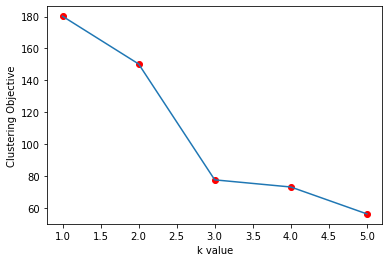

In [348]:
fig,ax = plt.subplots()
ax.plot([1,2,3,4,5],clustering_objective)
ax.set_xlabel('k value')
ax.set_ylabel('Clustering Objective')
ax.scatter([1,2,3,4,5],clustering_objective,color='red')

In [383]:
#Kmeans++

def create_init_cluster():
    l = X_normal.sample(1)
    clusters=[]
    clusters.append(l)
    return clusters

def find_second_point(clusters):
    d=[]
    for i in range(0,len(X_normal)):
        d.append(cdist(l.iloc[[0]],X_normal.iloc[[i]],'euclidean')[0][0])
    new_centeroid_idx = np.argmax(d)
    clusters.append(X_normal.iloc[[new_centeroid_idx]])
    return clusters
    
def get_new_centeroid_idx(curr_clusters):
    cluster_to_points = {}
    cluster_to_points_dist = []
    for i in range(0,len(curr_clusters)):
        cluster_to_points[i] = []
    
    for i in range(0,len(X_normal)):
        c_p_dist = []
        for j in range(0,len(curr_clusters)):
            c_p_dist.append(cdist(X_normal.iloc[[i]],curr_clusters[j].iloc[[0]],'euclidean'))
        min_idx = np.argmin(c_p_dist)
        cluster_to_points[min_idx].append(X_normal.iloc[[i]])
        cluster_to_points_dist.append(c_p_dist[min_idx][0][0])

    new_centeroid_idx = np.argmax(cluster_to_points_dist)
    return new_centeroid_idx
    
def init_clusters(k):
    clusters = create_init_cluster()
    if(k==2):
        clusters = find_second_point(clusters)
    elif(k>2):
        clusters = find_second_point(clusters)
        for i in range(3,k+1):
            new_centeroid_idx = get_new_centeroid_idx(clusters)
            clusters.append(X_normal.iloc[[new_centeroid_idx]])
    return clusters



def calculate_distance(c1,c2):
    return cdist(c1,c2,'euclidean')[0][0]

def get_new_centeroids(k,centeroids):
    cluster_to_point = {}         #dictionary to store which point belongs to which cluster 
    centeroid_to_point_dist={}
    for j in range(0,k):          #initialize arrays to store sample indices for each cluster
        cluster_to_point[j] = []
        centeroid_to_point_dist[j] = []
    for i in range(0,len(X_normal)):     #loop through all samples
        d = []                    #array to store distance of a sample point from all centeroids
        for j in range(0,k):      #loop through all centeroids
            d.append(calculate_distance(X_normal.iloc[[i]],centeroids.iloc[[j]])) #add distance value to the array
             
        min_idx = np.argmin(d)   #find the index of the minimum distance between a sample point and a centeroid
        x_1,x_2 = X_normal['X1'][i],X_normal['X2'][i]
        x = [x_1,x_2]
        cluster_to_point[min_idx].append(x)
        centeroid_to_point_dist[min_idx].append(d[min_idx])
    
    new_centeroids = []
    centeroid_to_point_sum =[]
    for i in range(0,k):
        new_centeroids.append(pd.DataFrame(cluster_to_point[i],columns=['X1','X2']).mean())
        centeroid_to_point_sum.append(np.array(centeroid_to_point_dist[i]).sum())
    k_cluster_to_point[k] = cluster_to_point
    return new_centeroids,np.array(centeroid_to_point_sum).sum()      
    
    

def kmeans_implementation(k):     #k = number of clusters
    a = init_clusters(k)   
    init_centeroids = pd.DataFrame(a[0])
    accuracies[k] = []
    for i in range(1,len(a)):
        init_centeroids = init_centeroids.append(a[i]) 
    new_centeroids,centeroid_to_point_sum = get_new_centeroids(k,init_centeroids)
    accuracies[k].append(centeroid_to_point_sum)
    
    for i in range(0,49):
        new_centeroids,centeroid_to_point_sum = get_new_centeroids(k,pd.DataFrame(new_centeroids))
        accuracies[k].append(centeroid_to_point_sum)
    return centeroid_to_point_sum,cluster_to_point
    

accuracies={}
clustering_objective = []
k_cluster_to_point = {}
k_centeroids = {}
for i in range(1,6):
    centeroid_to_point_sum,cluster_to_point = kmeans_implementation(i)
    clustering_objective.append(centeroid_to_point_sum)


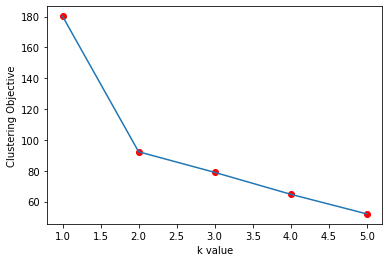

In [363]:
fig,ax = plt.subplots()
ax.plot([1,2,3,4,5],clustering_objective)
ax.set_xlabel('k value')
ax.set_ylabel('Clustering Objective')
ax.scatter([1,2,3,4,5],clustering_objective,color='red')

<b>Best value of k = 3</b>

In [380]:
k_cluster_to_point[3]
c=[]
for i in range(0,3):
    c.append(pd.DataFrame(k_cluster_to_point[3][i],columns=['X1','X2']))

Text(0.5, 1.0, 'accuracy for 50 iterations of k=3')

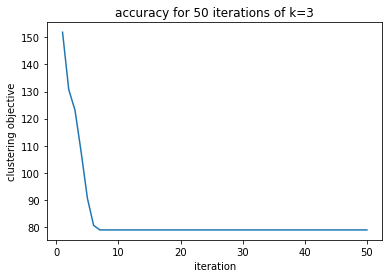

In [381]:
fig,ax = plt.subplots()
ax.plot(np.arange(1,51),accuracies[3])
ax.set_xlabel('iteration')
ax.set_ylabel('clustering objective')
ax.set_title('accuracy for 50 iterations of k=3')

Text(0, 0.5, 'X2')

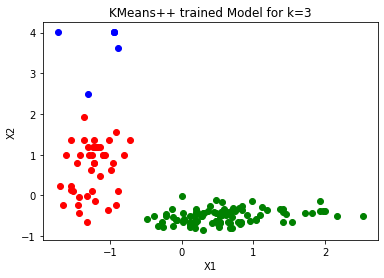

In [382]:
fig,ax = plt.subplots()
plt.scatter(c[0]['X1'],c[0]['X2'],color='red')
plt.scatter(c[1]['X1'],c[1]['X2'],color='blue')
plt.scatter(c[2]['X1'],c[2]['X2'],color='green')
#plt.scatter(c[3]['X1'],c[3]['X2'],color='orange')
#plt.scatter(c[4]['X1'],c[4]['X2'],color = 'black')
ax.set_title('KMeans++ trained Model for k=3')
ax.set_xlabel('X1')
ax.set_ylabel('X2')